In [2]:
import math
import random
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def coin_flip():
    return random.choice([True, False])

In [4]:
def num_flips(flips=2**16):
    i = 1
    heads = 0
    tracker = []
    while i <= flips:
        if coin_flip():
            heads += 1
        if math.log2(i) % 1 == 0 or i == flips:
            tracker.append((i, heads))
        i += 1
    return tracker

trk1 = list(zip(*num_flips()))


def ratio_flips(list):
    return [list[1][x] / list[0][x] for x in range(len(list[0]))]
    

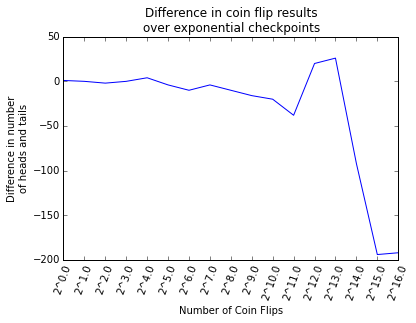

In [5]:
plt.plot([trk1[1][x] - (trk1[0][x] - trk1[1][x]) for x in range(len(trk1[0]))])
plt.xticks(range(len(trk1[0])), ['2^'+str(round(math.log2(x), 2)) for x in trk1[0]], rotation = 70)
plt.xlabel("Number of Coin Flips")
plt.ylabel("Difference in number\nof heads and tails")
plt.title("Difference in coin flip results\nover exponential checkpoints")
plt.show()

#### This data shows that for high numbers of coin flips, the difference between heads results and tails results can vary drastically

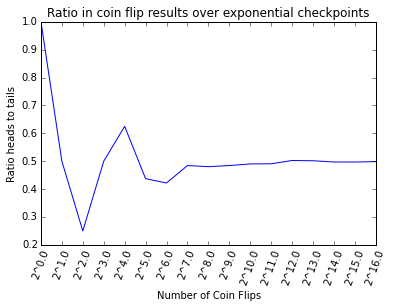

In [6]:
ratio_trk = ratio_flips(trk1)
plt.plot(ratio_trk)
plt.xticks(range(len(trk1[0])), ['2^'+str(round(math.log2(x), 2)) for x in trk1[0]], rotation=70)
plt.xlabel("Number of Coin Flips")
plt.ylabel("Ratio heads to tails")
plt.title("Ratio in coin flip results over exponential checkpoints")
plt.show()

#### This data shows that despite the higher difference in results allowed for large numbers of coin tosses, the average still nears .5

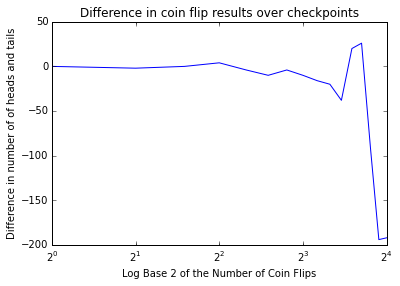

In [7]:
plt.plot([trk1[1][x] - (trk1[0][x] - trk1[1][x]) for x in range(len(trk1[0]))])
#plt.xticks(range(len(trk1[0])), ['2^'+str(round(math.log2(x), 2)) for x in trk1[0]])
plt.xscale('log', basex=2)
plt.xlabel("Log Base 2 of the Number of Coin Flips")
plt.ylabel("Difference in number of of heads and tails")
plt.title("Difference in coin flip results over checkpoints")
plt.show()

#### A logarithmic scale shows more even more drastic differences towards the end of the data.

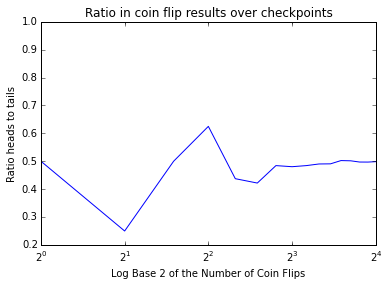

In [8]:
plt.plot(ratio_trk)
#plt.xticks(range(len(trk1[0])), ['2^'+str(round(math.log2(x), 2)) for x in trk1[0]])
plt.xscale('log', basex=2)
plt.xlabel("Log Base 2 of the Number of Coin Flips")
plt.ylabel("Ratio heads to tails")
plt.title("Ratio in coin flip results over checkpoints")
plt.show()

#### A logarithmic scale shows more drastic ratios near the beginning of the data while still showing the tendency towards .5

In [9]:
def num_num_flips(num=20, flips=2**16):
    matr = []
    for _ in range(num):
        matr.append(list(zip(*num_flips(flips))))
    return matr

my_matr = list(zip(*[ratio_flips(lst) for lst in num_num_flips()]))
matr_x = [2**x for x in range(len(my_matr))]

[0.45, 0.425, 0.4625, 0.4875, 0.46875, 0.459375, 0.5015625, 0.512109375, 0.5056640625, 0.5033203125, 0.501708984375, 0.5013427734375, 0.4998046875, 0.49915771484375, 0.49947509765625, 0.49955291748046876, 0.49953536987304686]
17


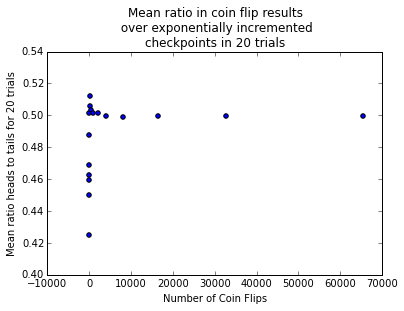

In [10]:
plt.scatter(matr_x, [st.mean(x) for x in my_matr])
plt.xlabel("Number of Coin Flips")
plt.ylabel("Mean ratio heads to tails for 20 trials")
plt.title("Mean ratio in coin flip results\n over exponentially incremented\ncheckpoints in 20 trials")
plt.show()

#### This data suggests that the ratio of coin flip results varied greatly at the start but eventually centered around .50 

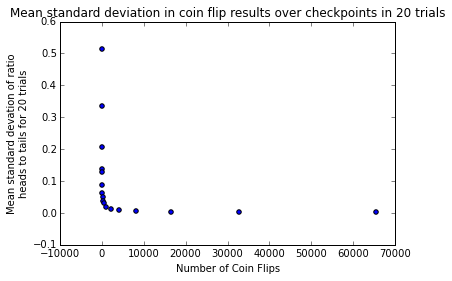

In [170]:
plt.scatter(matr_x, [st.stdev(x) for x in my_matr])
plt.xlabel("Number of Coin Flips")
plt.ylabel("Mean standard devation of ratio\nheads to tails for 20 trials")
plt.title("Mean standard deviation in coin flip results over checkpoints in 20 trials")
plt.show()

#### This data shows that the standard deviation of coin flip ratios neared zero for very high numbers of flips.

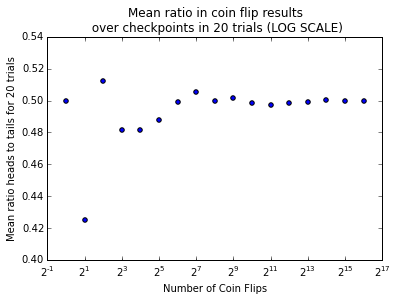

In [169]:
plt.scatter([2**x for x in range(len(my_matr))], [st.mean(x) for x in my_matr])
plt.xscale('log', basex=2)
plt.xlabel("Number of Coin Flips")
plt.ylabel("Mean ratio heads to tails for 20 trials")
plt.title("Mean ratio in coin flip results\n over checkpoints in 20 trials (LOG SCALE)")
plt.show()

#### A logarithmic scale still shows some wide variation in coin flip result ratios while offering a more gradual approach to .5

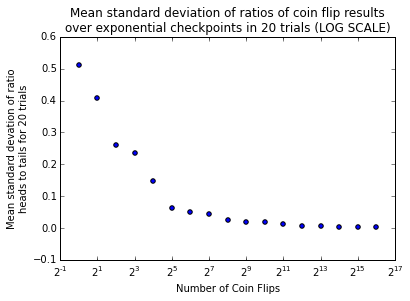

In [11]:
plt.scatter([2**x for x in range(len(my_matr))], [st.stdev(x) for x in my_matr])
plt.xscale('log', basex=2)
plt.xlabel("Number of Coin Flips")
plt.ylabel("Mean standard devation of ratio\nheads to tails for 20 trials")
plt.title("Mean standard deviation of ratios of coin flip results\nover exponential checkpoints in 20 trials (LOG SCALE)")
plt.show()

#### A logarithmic scale shows a slower, steadier apporach towards zero standard deviation

In [20]:
def itr_n_flips(itr, n):
    head_count = []
    for i in range(itr):
        heads = 0
        tails = 0
        for _ in range(n):
            if coin_flip():
                heads +=1
            else:
                tails +=1
        head_count.append(heads)
    return head_count
ck_100 = [x/100 for x in itr_n_flips(100000, 100)]

In [21]:
ck_1000 = [x/1000 for x in itr_n_flips(100000, 1000)]

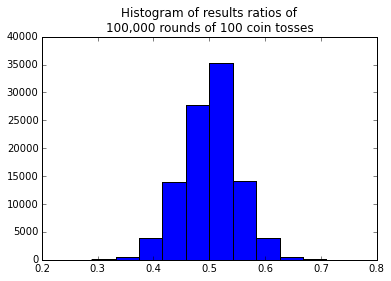

In [24]:
plt.hist(ck_100)
plt.title("Histogram of results ratios of\n100,000 rounds of 100 coin tosses")
plt.show()

#### By plotting results of sets of 100 coin flips, we see a general trend towards a ratio of .5

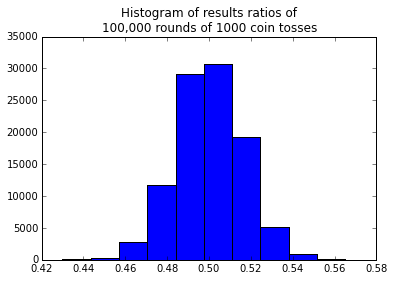

In [26]:
plt.hist(ck_1000)
plt.title("Histogram of results ratios of\n100,000 rounds of 1000 coin tosses")
plt.show()

#### By plotting results of sets of 1000 coin flips, we see a stronger trend towards a ratio of .5

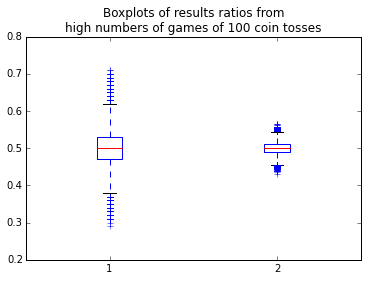

In [25]:
plt.boxplot([ck_100, ck_1000])
plt.title("Boxplots of results ratios from\nhigh numbers of games of 100 coin tosses")
#plt.xticks([100, 1000])
plt.show()

#### Between the results of tossing 100 coins and 1000, we again see a tighter trend with higher numbers